In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression





In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\shrad\AppData\Local\Temp\ipykernel_18608\1623505153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


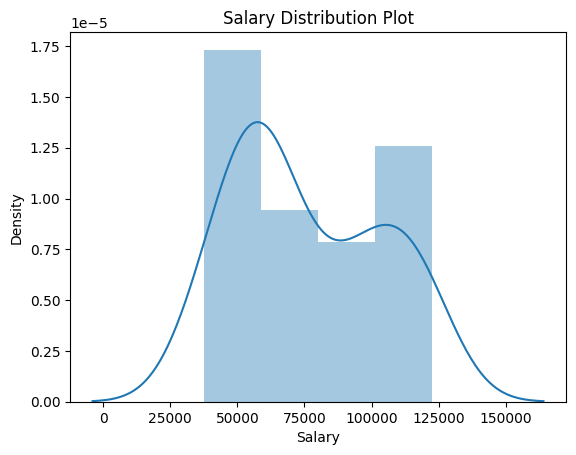

In [4]:
plt.title("Salary Distribution Plot")
sns.distplot(df['Salary'])
plt.show()

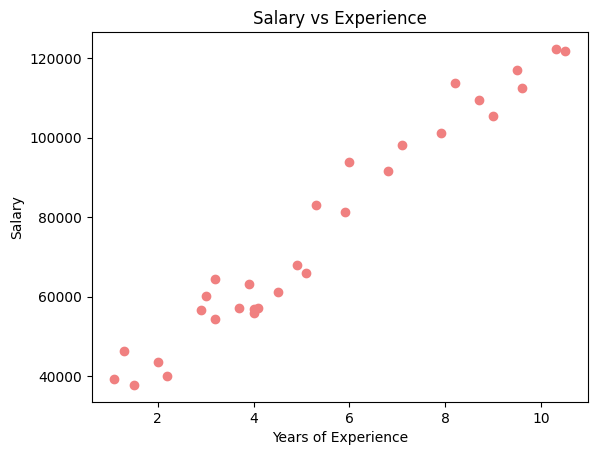

In [5]:
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(True)

In [6]:
x = df.iloc[:,:1]
y = df.iloc[:,1:]

In [7]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred_test = regressor.predict(x_test)     
y_pred_train = regressor.predict(x_train) 

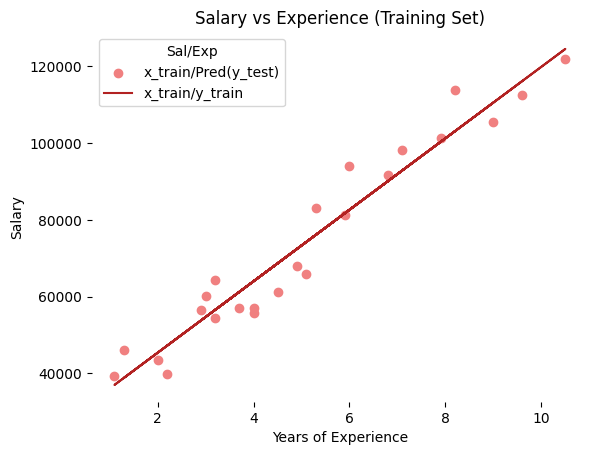

In [10]:
# Prediction on training set
plt.scatter(x_train, y_train, color = 'lightcoral')
plt.plot(x_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['x_train/Pred(y_test)', 'x_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()


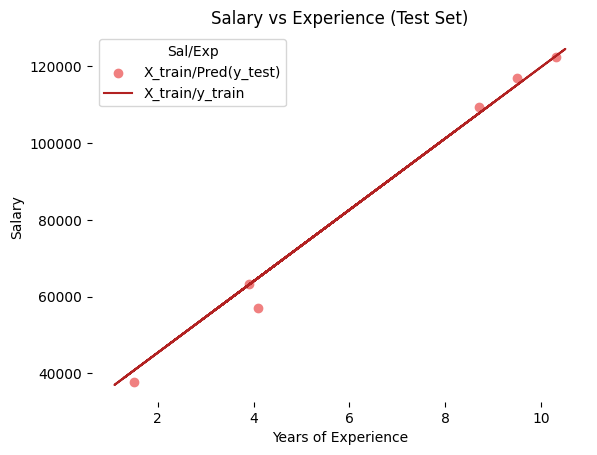

In [11]:
# Prediction on test set
plt.scatter(x_test, y_test, color = 'lightcoral')
plt.plot(x_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [12]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [13]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test, y_pred_test))


MSE 12823412.298126549


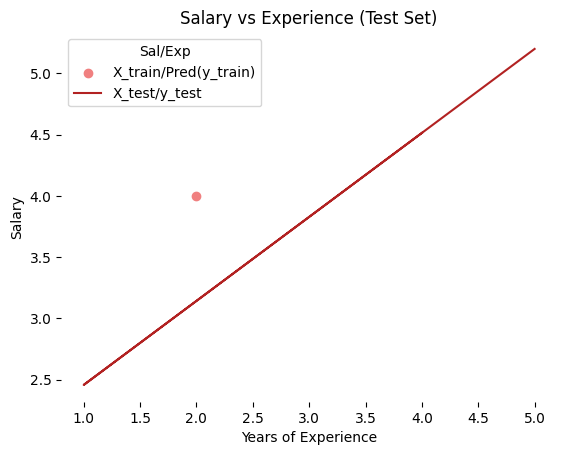

Coefficient: [0.68571429]
Intercept: 1.7714285714285714
MSE: 0.5240816326530615
MAE: 0.6400000000000001


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predictions
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

# Plotting
plt.scatter(x_test, y_test, color='lightcoral')
plt.plot(x_train, y_pred_train, color='firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_train)', 'X_test/y_test'], title='Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

# Metrics
y_pred_all = regressor.predict(X)
mse = mean_squared_error(y, y_pred_all)
mae = mean_absolute_error(y, y_pred_all)
print(f'MSE: {mse}')
print(f'MAE: {mae}')


In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, regressor.predict(X))
print(f'MSE: {mse}')


MSE: 0.5240816326530615


In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, regressor.predict(X))
print(f'MAE: {mae}')


MAE: 0.6400000000000001


In [17]:
y_pred = regressor.predict(X)
random_error = y - y_pred
print("Random Errors (Residuals):", random_error)


Random Errors (Residuals): [-0.45714286  0.85714286  1.17142857 -0.51428571 -0.2       ]


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df_sal = pd.read_csv(r"C:\Users\shrad\OneDrive\Desktop\ML_LAB\Assignment2\Salary_Data.csv")

# Features & target
X = df_sal[['YearsExperience']]  
Y = df_sal[['Salary']]

# Split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the target variable
scaler = MinMaxScaler()
Y_train_scaled = scaler.fit_transform(Y_train)
Y_test_scaled = scaler.transform(Y_test)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train_scaled)  # Fit on scaled Y

# Predictions on test set
Y_pred_test_scaled = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(Y_test_scaled, Y_pred_test_scaled)
mae = mean_absolute_error(Y_test_scaled, Y_pred_test_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_scaled, Y_pred_test_scaled)

# Model parameters (slope & intercept)
print("Slope (m):", model.coef_[0][0])
print("Intercept (b):", model.intercept_[0])

# Output results
print("\nMean Squared Error (MSE):", round(mse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("R² Score:", round(r2, 4))


Slope (m): 0.11131367024605451
Intercept (b): -0.14657945887341345

Mean Squared Error (MSE): 0.007
Mean Absolute Error (MAE): 0.0743
Root Mean Squared Error (RMSE): 0.0834
R² Score: 0.9024


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv(r"C:\Users\shrad\OneDrive\Desktop\ML_LAB\Assignment2\Salary_Data.csv")

# Features & target
X = data[['YearsExperience']]
y = data[['Salary']]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the target variable
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train_scaled)

# Predict on test set
y_pred_scaled = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Print model parameters
print(f"Slope (m): {model.coef_[0][0]}")
print(f"Intercept (b): {model.intercept_[0]}")

# Print evaluation metrics
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



Slope (m): 0.11131367024605451
Intercept (b): -0.14657945887341345

Mean Squared Error (MSE): 0.0070
Mean Absolute Error (MAE): 0.0743
Root Mean Squared Error (RMSE): 0.0834
R² Score: 0.9024
